### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from utils import MA,calculate_R2,split_train_test,change_df
import warnings
warnings.filterwarnings('ignore')

### Data

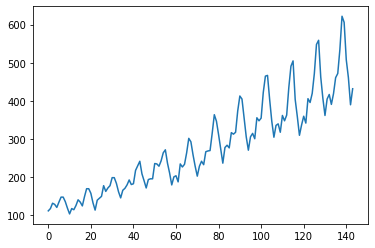

In [11]:
#! pip install sktime
y = load_airline()
plt.plot(y.to_numpy())
plt.show()

**Split train test**

In [4]:
y_train, y_test = split_train_test(y.to_numpy())
print(f"Train sequence length {len(y_train)}")
print(f"Test sequence length {len(y_test)}")

Train sequence length 90
Test sequence length 54


**Selecting best MA model** 

(model selected according to its R2 metrics on prediction for 3 month ahead)

In [5]:
best_q = 1
R2_best = 0
R2_1_history = []
R2_2_history = []
R2_3_history = []
import time
for q in range(1, 19):
    ma_model = MA(q=q)
    t0=time.time()
    ma_model.fit(y_train)
    
    R2_1 = calculate_R2(ma_model, y_test, step=1)
    R2_2 = calculate_R2(ma_model, y_test, step=2)
    R2_3 = calculate_R2(ma_model, y_test, step=3)
    R2 = (R2_1 + R2_2 + R2_3) / 3
    if R2 > R2_best:
        R2_best = R2
        best_q = q

    R2_1_history.append(R2_1)
    R2_2_history.append(R2_2)
    R2_3_history.append(R2_3)

    print(q, R2_1, R2_2, R2_3)

1 0.42998728307141587 -0.41367174021808295 -0.4265786075696063
2 0.5448243059731882 0.42242032652688133 -0.4265786075696063
3 0.6207718297596067 0.5893255158601793 0.36353900479422696
4 0.6215656399346077 0.6391673047001019 0.5894655259228989
5 0.5778681993581057 0.622441523011859 0.6433868137031908
6 0.5360117164099585 0.13604869065032443 0.38937984376778656
7 0.49184513467778135 0.37105039459603073 0.06198531283456876
8 0.6356730604297568 0.5109926567782119 0.46646755402316875
9 0.6235641405807627 0.43694375865298607 -0.1578608646132098
10 0.7114665896455155 0.7173051071691567 0.4995097290048227
11 0.7789056766726907 0.7315035674967769 0.5883346760601739
12 0.791356799376013 0.8328240511772892 0.6878820893432797
13 0.7836776412696171 0.8039143149928535 0.8275826926740333
14 0.7841912961926931 0.7916785516768653 0.7887607252985325
15 0.7790553527192997 0.7806291250146128 0.7666572138579542
16 0.7955204338069692 0.7914723656221455 0.786872834181824
17 0.6791136275615279 0.5514709595626

In [6]:
print("BEST Q parameter value", best_q)

BEST Q parameter value 13


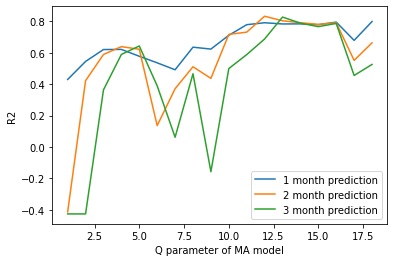

In [7]:
plt.plot(range(1, 19), R2_1_history, label="1 month prediction")
plt.plot(range(1, 19), R2_2_history, label="2 month prediction")
plt.plot(range(1, 19), R2_3_history, label="3 month prediction");
plt.ylabel("R2")
plt.xlabel("Q parameter of MA model");
plt.legend();

**R2 dependence on the step**

In [8]:
ma_model = MA(q=12)
ma_model.fit(y_train)

array([ 1.23605929,  1.00276755,  0.76037752,  0.34573682,  0.00880478,
       -0.15283955, -0.3411068 , -0.73534711, -0.85551401, -1.17646615,
       -0.85670434, -0.1448762 ])

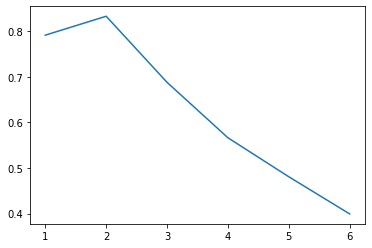

In [9]:
R2_steps = []

for i in range(1, 7):
    R2_steps.append(calculate_R2(ma_model, y_test, step=i))

plt.plot(range(1, 7), R2_steps);